# Supervised Learning
## Project: Rank Nursery-School Applications

## Getting Started

In this project, we will employ several supervised algorithms of our choice to accurately model individuals' income from a hierarchical decision model developed to rank applications for nursery schools. we will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. our goal with this implementation is to construct a model that accurately predicts the ranking of nursery-school applications. Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools. It was used for several years in the 1980s when there was excessive enrollment in these schools in Ljubljana, Slovenia, and the rejected applications frequently needed an objective explanation. The dataset for this project originates from the UCI Machine Learning Repository.

**Sources**:
- Creator: Vladislav Rajkovic et al. (13 experts)
- Donors: Marko Bohanec   (marko.bohanec@ijs.si)
      Blaz Zupan      (blaz.zupan@ijs.si)
- Date: June 1997 
You can find the dataset [here](https://archive.ics.uci.edu/ml/datasets/Nursery).

## Importing the libraries
Run the code cell below to load necessary Python libraries.

In [11]:
#Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

## Exploring the Data
Run the code cell below to load the census data.

In [12]:
#Importing the dataset
Data = pd.read_csv('Data/nursery.data', names=[
    'Parents','has_nursery','form','children','housing','finance','social','health','target'])
Data.head()

,Parents,has_nursery,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


**Features Exploration**

- **parents**: Parents' occupation (usual, pretentious, great_pret)
- **has_nursery**: Child's nursery (proper, less_proper, improper, critical, very_crit)
- **form**: Form of the family (complete, completed, incomplete, foster)
- **children**: Number of children (1, 2, 3, more)
- **housing**: Housing conditions (convenient, less_conv, critical)
- **finance**: Financial standing of the family (convenient, inconv)
- **social**: Social conditions (non-prob, slightly_prob, problematic)
- **health**: Health conditions (recommended, priority, not_recom)

## Information of the data

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Parents      12960 non-null  object
 1   has_nursery  12960 non-null  object
 2   form         12960 non-null  object
 3   children     12960 non-null  object
 4   housing      12960 non-null  object
 5   finance      12960 non-null  object
 6   social       12960 non-null  object
 7   health       12960 non-null  object
 8   target       12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


## Show the Target's Classifications
Nursery-School Applications (very_recom, recommend, not_recom, priority, spec_prior)

In [14]:
Data['target'].value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: target, dtype: int64

In [15]:
target = Data['target'].unique()
print(target)

Data['targetID'] = Data['target'].factorize()[0]
Data.head()

['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior']


,Parents,has_nursery,form,children,housing,finance,social,health,target,targetID
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority,1
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,2
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority,1


### Figure the Date

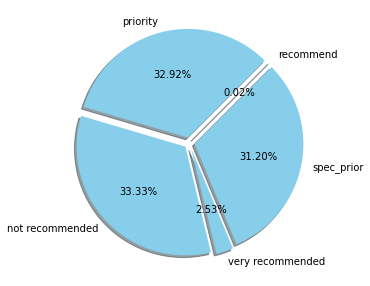

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
recommend = Data[Data['targetID'] == 0 ]
priority = Data[Data['targetID'] == 1 ]
not_recom = Data[Data['targetID'] == 2]
very_recom = Data[Data['targetID'] == 3]
spec_prior = Data[Data['targetID'] == 4]
count = [recommend['targetID'].count(), priority['targetID'].count(), not_recom['targetID'].count(), very_recom['targetID'].count(), spec_prior['targetID'].count()]
pie = plt.pie(count, labels = ['recommend', 'priority', 'not recommended', 'very recommended', 'spec_prior'],
              autopct = "%.2f%%",
              shadow = True, colors = colors, startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

## split the dataset to features and target

In [19]:
#split the dataset to features and target
X_data = Data.iloc[:,:-2].values
Y_data = Data['targetID']

print(X_data.shape)
print(Y_data.shape)
Y_data

(12960, 8)
(12960,)


0        0
1        1
2        2
3        0
4        1
        ..
12955    4
12956    2
12957    4
12958    4
12959    2
Name: targetID, Length: 12960, dtype: int64

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this datase. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

In [21]:
Data.head()

,Parents,has_nursery,form,children,housing,finance,social,health,target,targetID
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority,1
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,2
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority,1


---
### Implementation: Data Preprocessing

we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

As with the non-numeric features, we need to convert the non-numeric target labels to numerical values for the learning algorithm to work.

In [22]:
#preprocessing
from sklearn.compose import ColumnTransformer
oh = ColumnTransformer([('encoder',OneHotEncoder(),[0,1,2,3,4,5,6])],remainder="passthrough")
X_data = np.array(oh.fit_transform(X_data))
oh = ColumnTransformer([('encoder',OneHotEncoder(),[-1])],remainder="passthrough")
X_data = np.array(oh.fit_transform(X_data))
print(pd.DataFrame(X_data).head())

  0  1  2  3  4  5  6  7  8  9   ... 25 26 27 28 29 30 31 32 33 34
0  1  0  1  0  1  0  0  1  1  0  ...  0  0  0  1  0  0  1  0  1  0
1  1  0  1  0  0  1  1  0  1  0  ...  0  0  0  1  0  0  1  0  1  0
2  1  0  0  1  1  0  1  0  1  0  ...  0  0  0  1  0  0  1  0  1  0
3  0  1  1  0  1  0  0  1  1  0  ...  0  0  0  1  0  0  1  0  0  0
4  0  1  1  0  0  1  1  0  1  0  ...  0  0  0  1  0  0  1  0  0  0

[5 rows x 35 columns]


# Splitting the dataset into the Training set, validation and Test set

In [25]:
#Splitting the dataset into the Training set, validation and Test set
X, x_test, Y, y_test = train_test_split(X_data, Y_data, 
                                        test_size=0.33, 
                                        random_state=0)
x_train, x_vali, y_train, y_vali = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=2)

# Show the results of the split
print("Training set has {} samples.".format(x_train.shape[0]))
print("Validation set has {} samples.".format(x_vali.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 5817 samples.
Validation set has 2866 samples.
Testing set has 4277 samples.


# Training the models on the Training set

In [26]:
#Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

#Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train, y_train)

#Training the Decision Tree model on the Training set
tree = DecisionTreeClassifier(max_depth=15, criterion='entropy', random_state=2)
tree.fit(x_train, y_train)

#Training the Random Forest Classifier model on the Training set
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
RFC.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

# Predicting the dataset results

In [27]:
acc_train = []
acc_vali = []
acc_test = []

# Predicting the Test set results
y_pred_train = knn.predict(x_train)
acc_train.append(accuracy_score(y_train, y_pred_train) * 100)
print(f"KNN acc_train: {acc_train[0]:.2f}")

y_pred_vali = knn.predict(x_vali)
acc_vali.append(accuracy_score(y_vali, y_pred_vali) * 100)
print(f"KNN acc_vali: {acc_vali[0]:.2f}")

y_pred_test = knn.predict(x_test)
acc_test.append(accuracy_score(y_test, y_pred_test) * 100)
print(f"KNN acc_test: {acc_test[0]:.2f}")
print()


# Predicting the Test set results
y_pred_train = naive.predict(x_train)
acc_train.append(accuracy_score(y_train, y_pred_train) * 100)
print(f"NAIVE BAYES acc_train: {acc_train[1]:.2f}")

y_pred_vali = naive.predict(x_vali)
acc_vali.append(accuracy_score(y_vali, y_pred_vali) * 100)
print(f"NAIVE BAYES acc_vali: {acc_vali[1]:.2f}")

y_pred_test = naive.predict(x_test)
acc_test.append(accuracy_score(y_test, y_pred_test) * 100)
print(f"NAIVE BAYES acc_test: {acc_test[1]:.2f}")
print()


# Predicting the Test set results
y_pred_train = tree.predict(x_train)
acc_train.append(accuracy_score(y_train, y_pred_train) * 100)
print(f"DT acc_train: {acc_train[2]:.2f}")

y_pred_vali = tree.predict(x_vali)
acc_vali.append(accuracy_score(y_vali, y_pred_vali) * 100)
print(f"DT acc_vali: {acc_vali[2]:.2f}")

y_pred_test = tree.predict(x_test)
acc_test.append(accuracy_score(y_test, y_pred_test) * 100)
print(f"DT acc_test: {acc_test[2]:.2f}")
print()


# Predicting the Test set results
y_pred_train = RFC.predict(x_train)
acc_train.append(accuracy_score(y_train, y_pred_train) * 100)
print(f"RFC acc_train: {acc_train[3]:.2f}")

y_pred_vali = RFC.predict(x_vali)
acc_vali.append(accuracy_score(y_vali, y_pred_vali) * 100)
print(f"RFC acc_vali: {acc_vali[3]:.2f}")

y_pred_test = RFC.predict(x_test)
acc_test.append(accuracy_score(y_test, y_pred_test) * 100)
print(f"RFC acc_test: {acc_test[3]:.2f}")

KNN acc_train: 97.15
KNN acc_vali: 94.38
KNN acc_test: 94.67

NAIVE BAYES acc_train: 84.17
NAIVE BAYES acc_vali: 82.66
NAIVE BAYES acc_test: 84.52

DT acc_train: 100.00
DT acc_vali: 98.95
DT acc_test: 98.67

RFC acc_train: 100.00
RFC acc_vali: 97.45
RFC acc_test: 97.78


# show the Models results

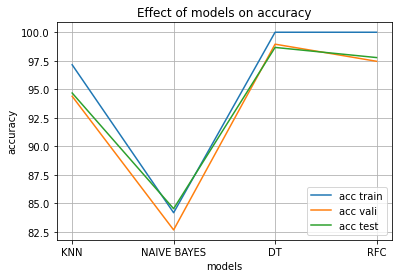

In [28]:
x = ['KNN', 'NAIVE BAYES', 'DT', 'RFC']
plt.plot(x, acc_train, label='acc train')
plt.plot(x, acc_vali, label='acc vali')
plt.plot(x, acc_test, label='acc test')


plt.legend()
plt.grid(axis='both')
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('Effect of models on accuracy')
plt.show()

## choose the best max_depth from range(10, 20)

In [29]:
max_depth_values=[]
for i in range(10,20):
    max_depth_values.append(i)
train_acc_val=[]
test_acc_val=[]
vali_acc_val=[]
for max_depth_val in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=max_depth_val, criterion='entropy', random_state=2)
    #print(max_depth_val)
    tree.fit(x_train, y_train)
    y_pred_train = tree.predict(x_train)
    y_pred_vali = tree.predict(x_vali)
    y_pred_test = tree.predict(x_test)
    train_acc_val.append(accuracy_score(y_train, y_pred_train))
    vali_acc_val.append(accuracy_score(y_vali, y_pred_vali))
    test_acc_val.append(accuracy_score(y_test, y_pred_test))

### show Effect of Max depth from range(10, 20) on accuracy

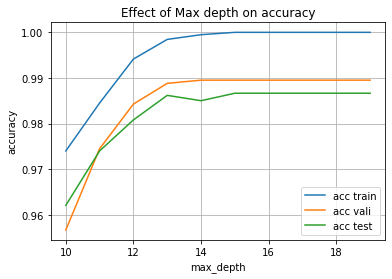

In [30]:
plt.plot(max_depth_values, train_acc_val, label='acc train')
plt.plot(max_depth_values, vali_acc_val, label='acc vali')
plt.plot(max_depth_values, test_acc_val, label='acc test')
plt.legend()
plt.grid(axis='both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect of Max depth on accuracy')
plt.show()

# Train The Decision Tree Classifier Model

In [31]:
#Training the Decision Tree model on the Training set
tree = DecisionTreeClassifier(max_depth=15, criterion='entropy', random_state=2)
tree.fit(x_train, y_train)

# Predicting the Test set results
y = []
y_pred_train = tree.predict(x_train)
y.append(accuracy_score(y_train, y_pred_train) * 100)
print(f"DT acc_train: {y[0]:.2f}")

y_pred_vali = tree.predict(x_vali)
y.append(accuracy_score(y_vali, y_pred_vali) * 100)
print(f"DT acc_vali: {y[1]:.2f}")

y_pred_test = tree.predict(x_test)
y.append(accuracy_score(y_test, y_pred_test) * 100)
print(f"DT acc_test: {y[2]:.2f}")

DT acc_train: 100.00
DT acc_vali: 98.95
DT acc_test: 98.67


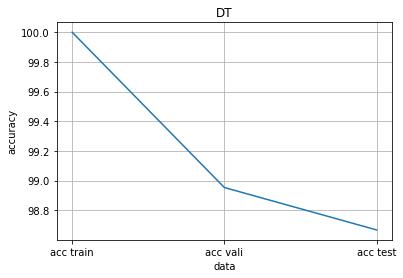

In [32]:
x = ['acc train', 'acc vali', 'acc test']
plt.plot(x, y)

plt.grid(axis='both')
plt.xlabel('data')
plt.ylabel('accuracy')
plt.title('DT')
plt.show()